# EDA & Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw= pd.read_csv("data/real_estate_valuation_data_set.csv").drop(columns="No")

In [3]:
data_raw.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


- X1: Transaction date
- X2: house age
- X3: distance to the nearest MRT station
- X4: number of convenience stores
- X5: latitude
- X6: longitude 
- Y: house price of unit area

In [4]:
data_raw.columns = [x.split(" ")[0] for x in data_raw.columns]

In [5]:
data_raw.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
data_raw.shape

(414, 7)

In [7]:
target="Y"
x_cols= [x for x in data_raw.columns  if x != target]

# Estadisticas descriptivas

In [8]:
data_raw.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Histograms

Comportamiento individual de cada caracteristica

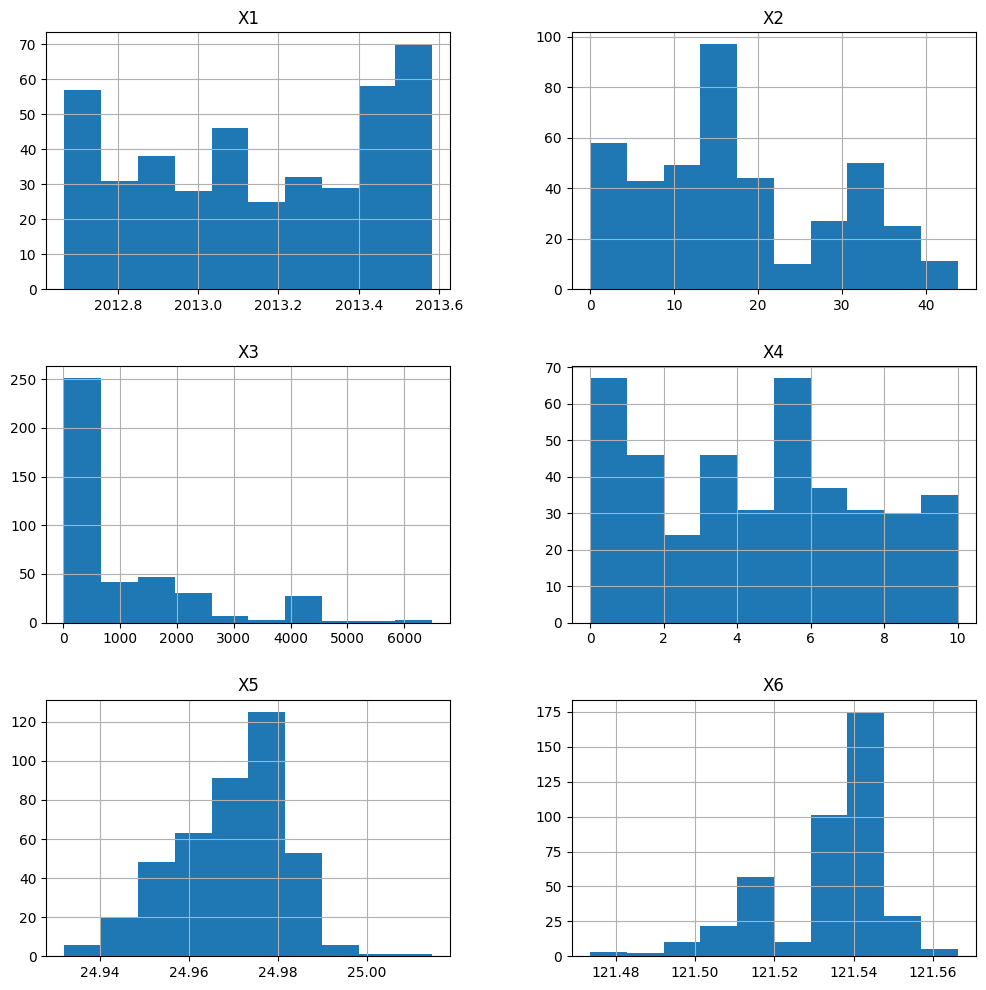

In [9]:
data_raw[x_cols].hist(figsize=(12, 12))
plt.show()

Comportamiento de la variable de respuesta

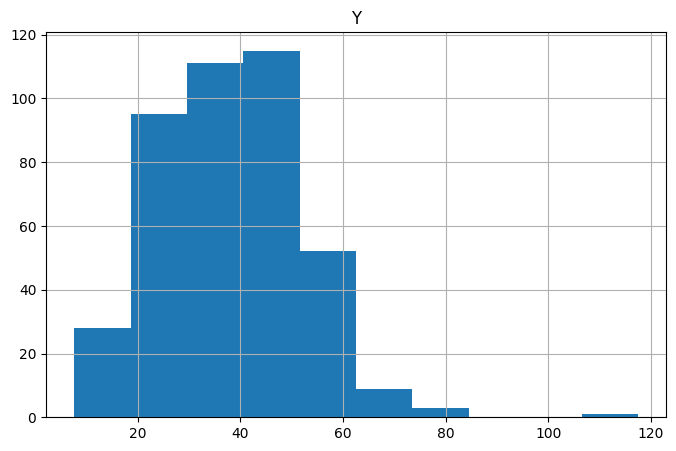

In [10]:
data_raw[[target]].hist(figsize=(8, 5))
plt.show()

### Histogramas por cada variable y dispersión entre variables

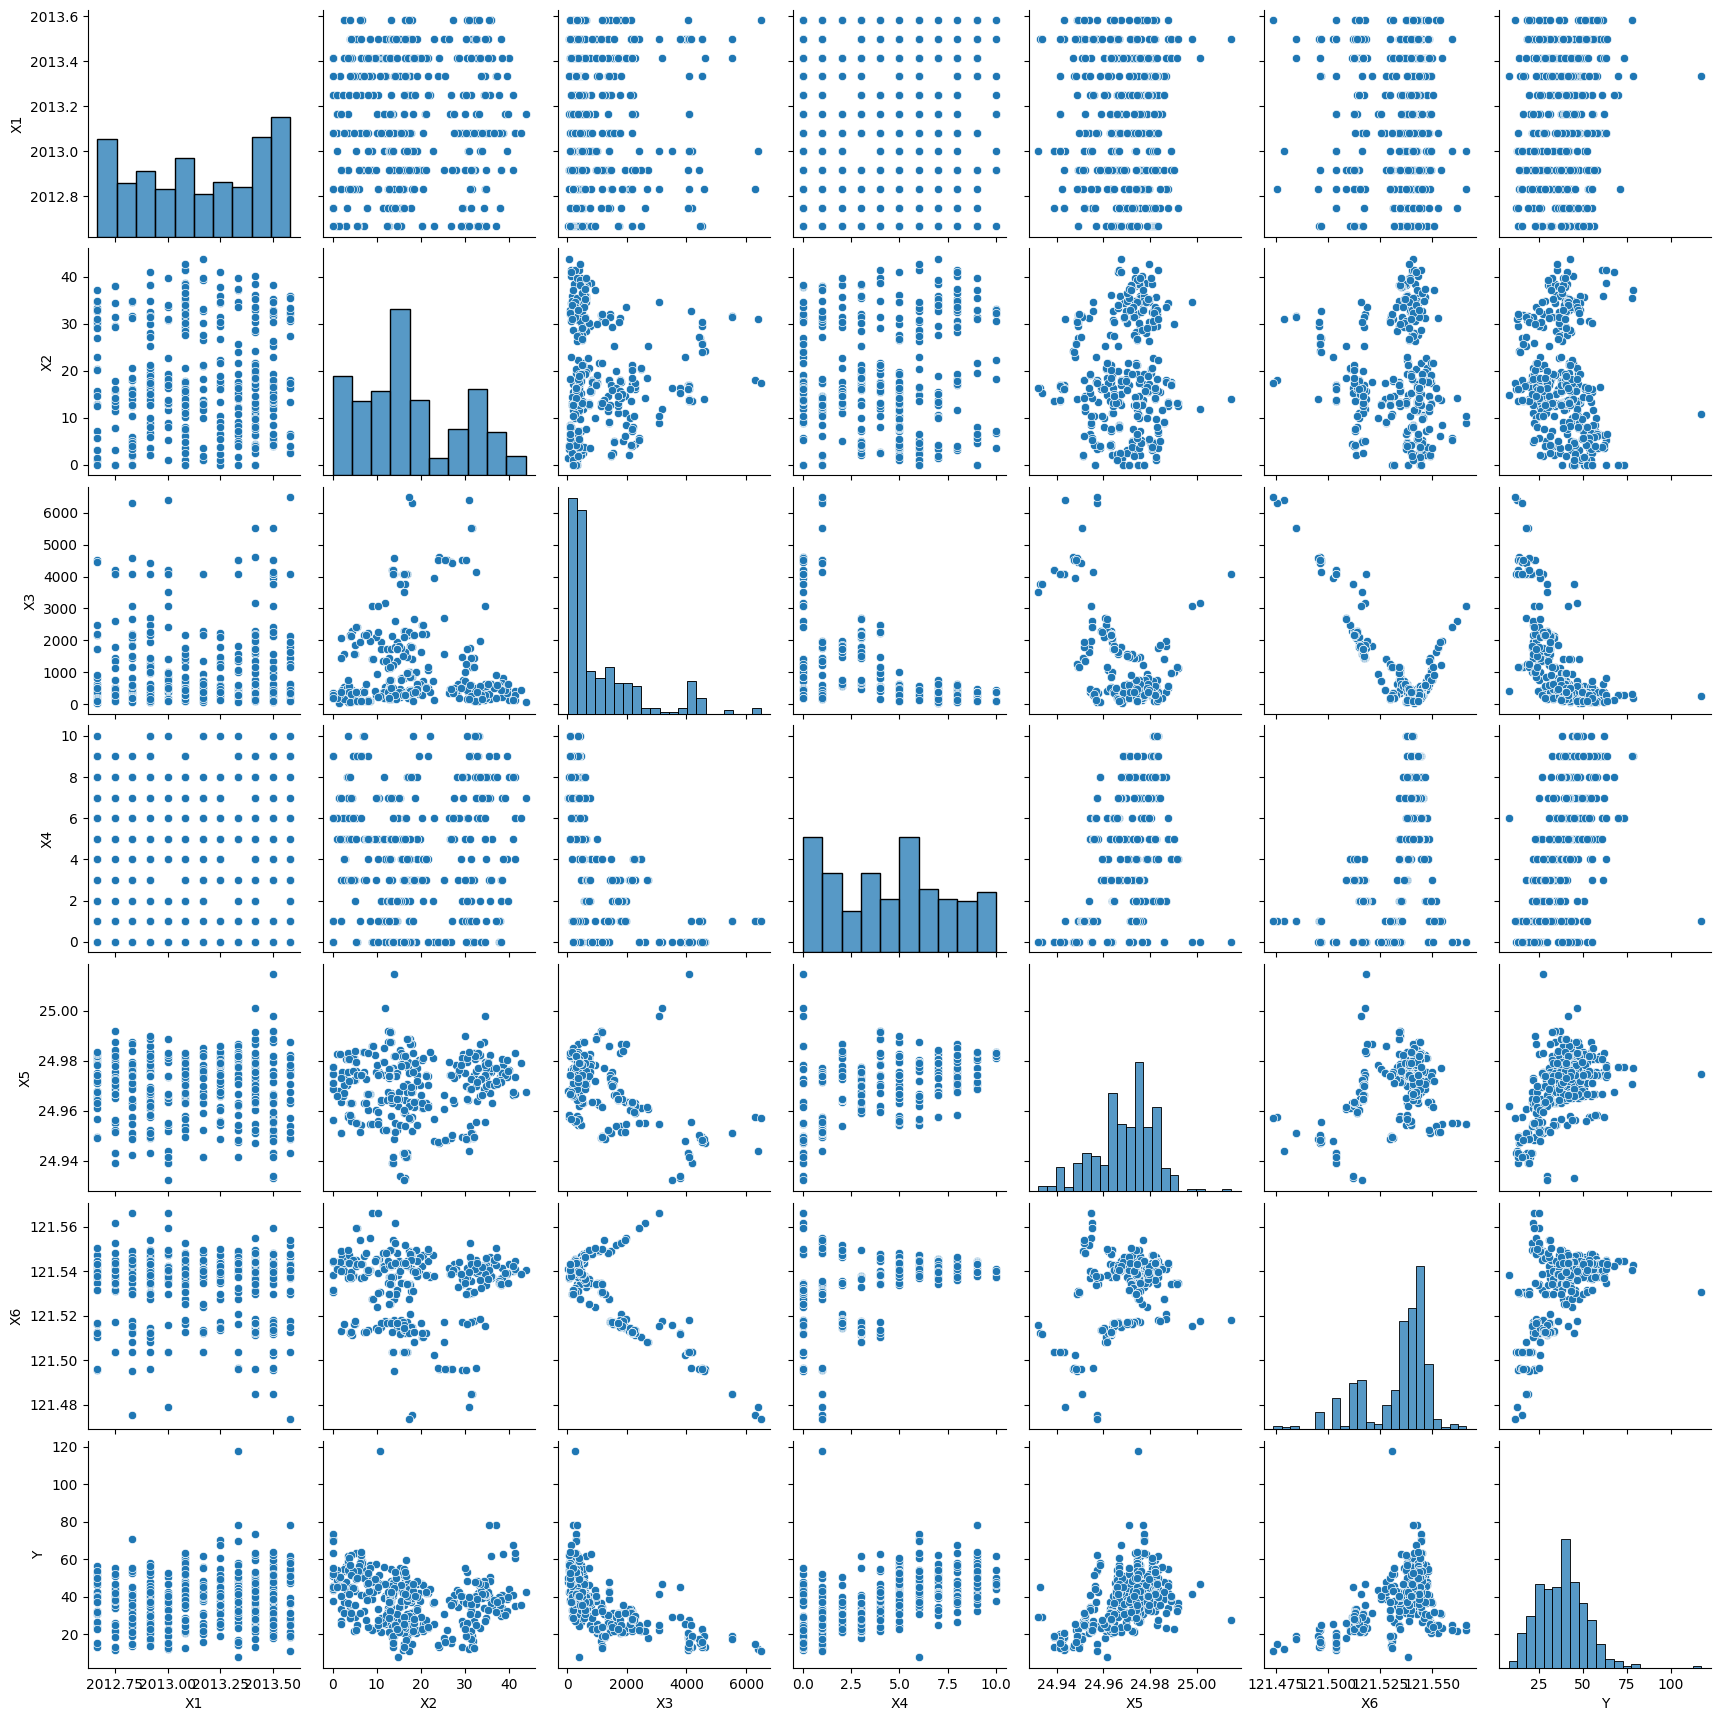

In [11]:
sns.pairplot(data_raw,)

### Matriz de correlación


<Axes: >

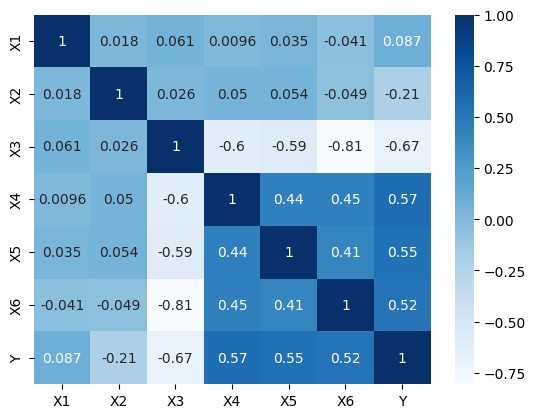

In [12]:
import seaborn as sb
corr = data_raw.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

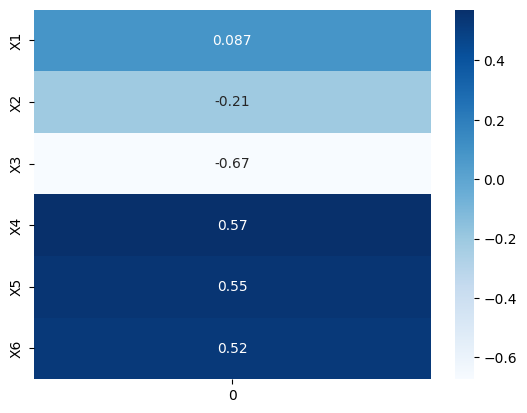

In [13]:
corrw = data_raw.drop([target], axis=1).corrwith(data_raw[target])
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

<Figure size 2500x1000 with 0 Axes>

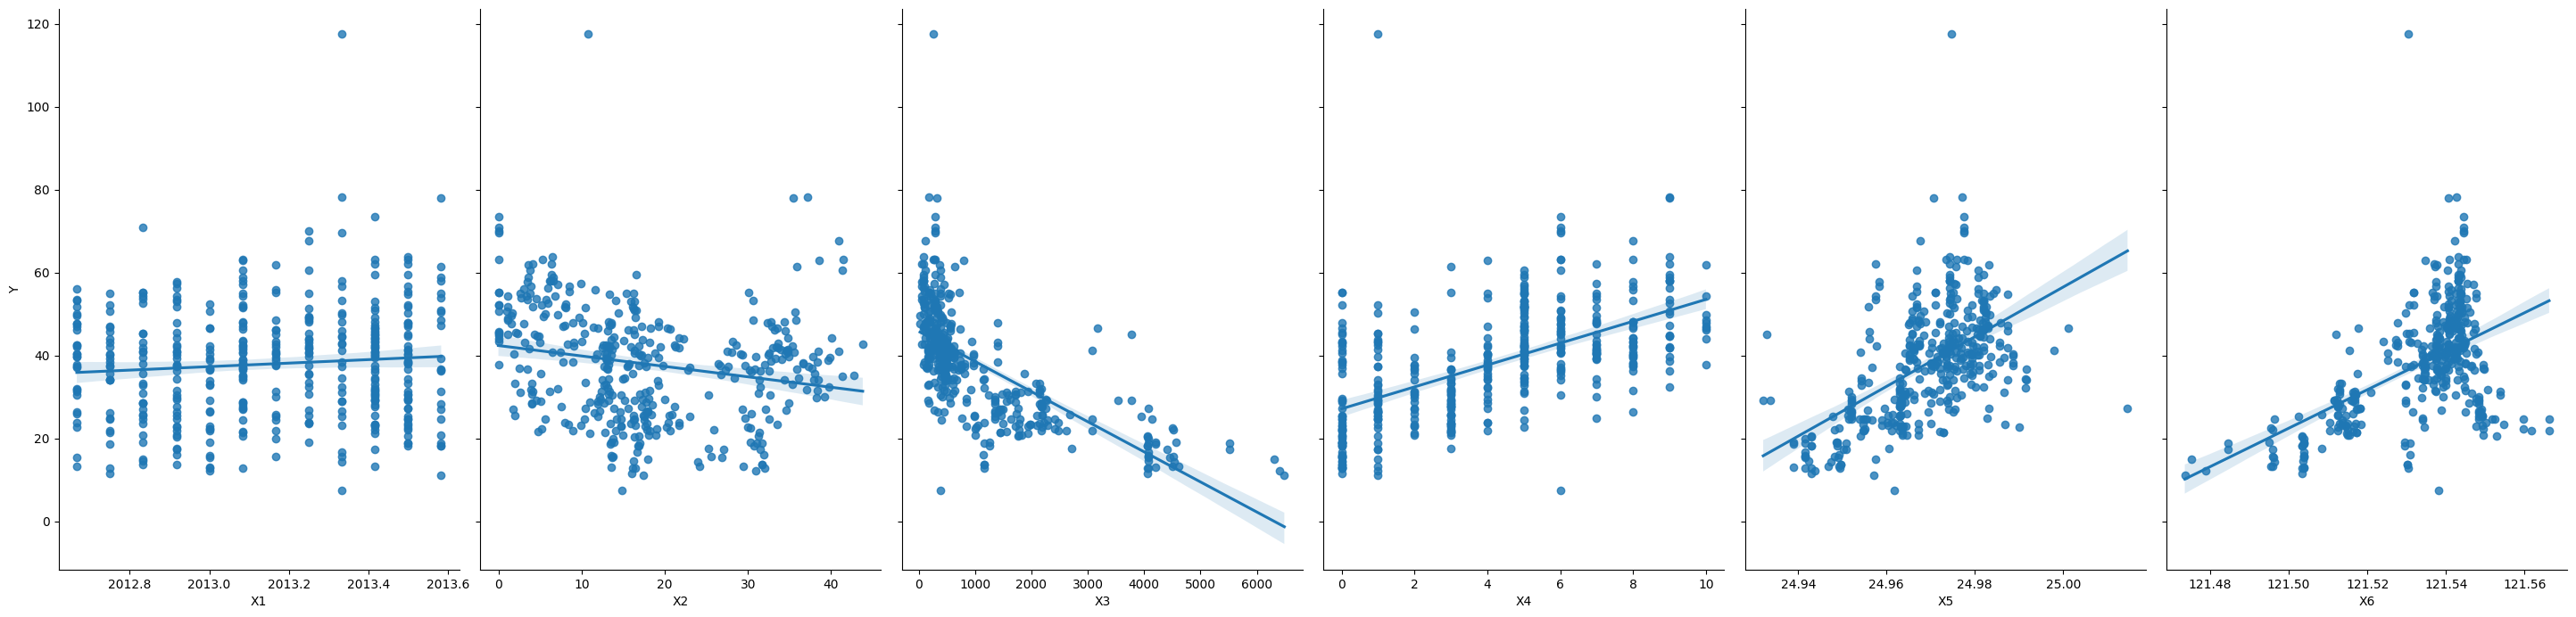

In [14]:
plt.figure(figsize=(25,10))
sns.pairplot(data=data_raw, x_vars=x_cols, y_vars=target, height=7, aspect=0.7, kind='reg')
plt.show()


### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{X1} + \beta_2 \times \text{X2} + \beta_3 \times \text{X3}+ \beta_4 \times \text{X4} + \beta_5 \times \text{X5} + \beta_6 \times \text{X6}$

In [15]:
# nombres de características
print(x_cols)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6']


In [16]:
# dataframe de características
X = data_raw[x_cols]
X.head()

,X1,X2,X3,X4,X5,X6
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [17]:
X.shape

(414, 6)

In [18]:
# variable de respuesta
y = data_raw[target]
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y, dtype: float64

In [19]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# tamaños 
print(f"training dataset :{X_train.shape}")
print(f"training target :{y_train.shape}")
print(f"testing dataset :{X_test.shape}")
print(f"training taget :{y_test.shape}")

training dataset :(310, 6)
training target :(310,)
testing dataset :(104, 6)
training taget :(104,)


In [22]:
print(X.head())
print(X_train.head())

         X1    X2         X3  X4        X5         X6
0  2012.917  32.0   84.87882  10  24.98298  121.54024
1  2012.917  19.5  306.59470   9  24.98034  121.53951
2  2013.583  13.3  561.98450   5  24.98746  121.54391
3  2013.500  13.3  561.98450   5  24.98746  121.54391
4  2012.833   5.0  390.56840   5  24.97937  121.54245
           X1    X2         X3  X4        X5         X6
368  2013.417  18.2   350.8515   1  24.97544  121.53119
218  2013.417  13.6   492.2313   5  24.96515  121.53737
127  2013.250   3.8   383.8624   5  24.98085  121.54391
351  2012.833   4.0  2180.2450   3  24.96324  121.51241
173  2013.083  41.3   401.8807   4  24.98326  121.54460


In [23]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [24]:
# tamaños 
print(f"training dataset :{X_train.shape}")
print(f"training target :{y_train.shape}")
print(f"testing dataset :{X_test.shape}")
print(f"training taget :{y_test.shape}")

training dataset :(331, 6)
training target :(331,)
testing dataset :(83, 6)
training taget :(83,)


## Train a model 
using random split procedure with 20/80 ratio

In [25]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-12796.117684899311
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


In [27]:
# coeficientes con nombre de las características
list(zip(x_cols, linreg.coef_))

[('X1', np.float64(5.717142183610285)),
 ('X2', np.float64(-0.24932646689585372)),
 ('X3', np.float64(-0.004937698432022963)),
 ('X4', np.float64(1.0761450934453072)),
 ('X5', np.float64(227.03710037116485)),
 ('X6', np.float64(-35.69883346505082))]

### Predicciones usando los datos de prueba

In [28]:
y_pred = linreg.predict(X_test)

## Evaluar modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [29]:
from sklearn import metrics
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [30]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.343030944663011
MSE:  45.01050719519324
RMSE:  6.708987046879226


In [31]:
# mean absolute error
MAE_train = metrics.mean_absolute_error(y_train, linreg.predict(X_train))

# mean squared error
MSE_train = metrics.mean_squared_error(y_train, linreg.predict(X_train))

# root mean squared error
RMSE_train = np.sqrt(MSE_train)

print("MAE_train: ", MAE_train)
print("MSE_train: ", MSE_train)
print("RMSE_train: ", RMSE_train)

print("MAE_train - MAE", (MAE_train - MAE))
print("MSE_train - MSE", (MSE_train - MSE))
print("RMSE_train - RMSE", (RMSE_train - RMSE))

MAE_train:  6.4179121503072984
MSE_train:  85.50448723420668
RMSE_train:  9.2468636431066
MAE_train - MAE 1.0748812056442878
MSE_train - MSE 40.49398003901344
RMSE_train - RMSE 2.537876596227374


### Selección de variables - Modelo con otro subconjunto de variables

In [32]:
x_cols
## removamos X1:transaction date que en el EDA no muestra mucha inflencia sobre la variable Y

['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

In [33]:
# x_cols2 = [ x for x in x_cols if x != 'X1']
x_cols2= ['X1','X2','X4','X5','X6']

# X = data_raw[x_cols2]
# y = data_raw[target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# linreg.fit(X_train, y_train)

# y_pred = linreg.predict(X_test)

# MAE = metrics.mean_absolute_error(y_test, y_pred)
# MSE = metrics.mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print("MAE: ", MAE)
# print("MSE: ", MSE)
# print("RMSE: ", RMSE)

### Validación cruzada

In [34]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [35]:
print(mse_scores.mean())

78.33423177467732


In [36]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]


In [37]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.69343426034657


## Ahora usando statsmodels

In [38]:
import statsmodels.api as sm

X = data_raw[x_cols]
y = data_raw[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model1 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     66.16
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           2.18e-53
Time:                        22:29:49   Log-Likelihood:                -1205.9
No. Observations:                 331   AIC:                             2426.
Df Residuals:                     324   BIC:                             2452.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.28e+04   8162.549     -1.568      0.1

In [39]:
import statsmodels.api as sm

X = data_raw[x_cols2]
y = data_raw[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2 = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     66.28
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.40e-47
Time:                        22:29:49   Log-Likelihood:                -1221.9
No. Observations:                 331   AIC:                             2456.
Df Residuals:                     325   BIC:                             2479.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.372e+04   6427.428     -6.802      0.0

### Determinar la influencia de las observaciones

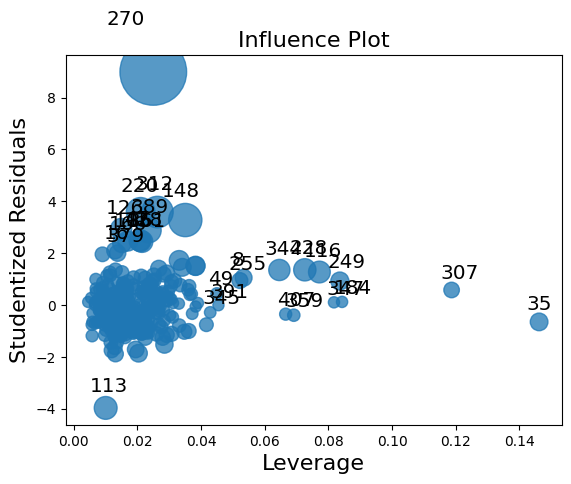

In [40]:
fig = sm.graphics.influence_plot(model1, criterion="cooks")

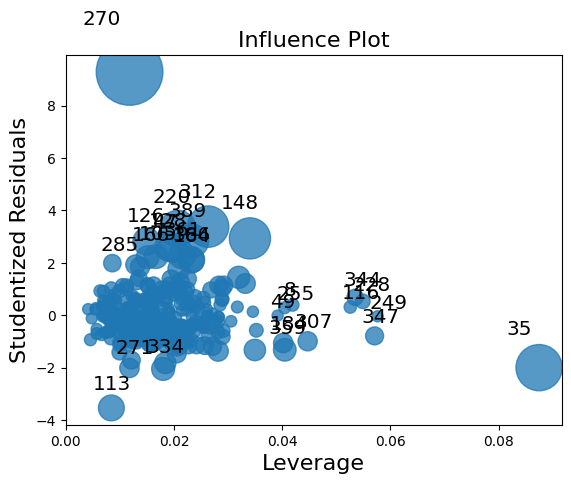

In [41]:
fig = sm.graphics.influence_plot(model2, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [42]:
# disntacia de Cook
model_cooksd = model1.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.012084592145015106
Index([389, 164, 228, 312, 270, 105, 361, 344, 128,  47, 113, 116, 220, 148,
       166, 126, 382, 386],
      dtype='int64') 
 [0.02802755 0.01280964 0.02056927 0.04790531 0.23782371 0.01476708
 0.01845694 0.01797702 0.01838181 0.01857667 0.02193064 0.01932239
 0.03826478 0.05415209 0.01231812 0.01817836 0.01443008 0.01299657]


In [43]:
X_train[out_d]

,const,X1,X2,X4,X5,X6
389,1.0,2013.250,40.9,8,24.96756,121.54230
164,1.0,2012.833,0.0,0,24.97110,121.53170
228,1.0,2013.417,11.9,0,25.00115,121.51776
312,1.0,2013.583,35.4,9,24.97071,121.54069
270,1.0,2013.333,10.8,1,24.97460,121.53046
105,1.0,2012.833,0.0,6,24.97744,121.54458
361,1.0,2013.083,41.4,8,24.97345,121.54093
344,1.0,2013.500,34.6,0,24.99800,121.51550
128,1.0,2013.083,41.3,6,24.96674,121.54039
47,1.0,2013.583,35.9,3,24.97563,121.53715


In [44]:
y_train[out_d]

389     67.7
164     55.2
228     46.6
312     78.0
270    117.5
105     71.0
361     63.3
344     41.2
128     60.7
47      61.5
113      7.6
116     12.2
220     78.3
148     45.1
166     73.6
126     62.9
382     29.3
386     55.3
Name: Y, dtype: float64

In [45]:
# disntacia de Cook
model_cooksd = model2.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.012084592145015106
Index([389, 164, 312, 270, 334, 105, 361,  35, 128,  47, 113, 359, 220, 148,
       166, 126, 386],
      dtype='int64') 
 [0.03137756 0.01749136 0.04992577 0.1357931  0.01267232 0.01397284
 0.01898657 0.06328187 0.02152755 0.02164334 0.01708548 0.01217601
 0.03758772 0.0493973  0.01243119 0.01965655 0.01766375]


Evaluacion del modelo: 
- coeficientes
- prueba F/omnibus
- JarqueBera/skewness/kurtosis
- AIC/BIC
- DurbinWatson

Metricas:
- MAE
- MSE
- RMSE